## 신경망 모델 훈련 
- EarlyStopping  
- Dropout  
- CheckPoint  

###  EarlyStopping

- EarlyStopping(monitor = 'val_loss',   
                  - min_delta = 0,   
                  - patience = 0,   
                  - mode = 'auto', 
                  - restore_best_weights=True)  

- monitor : 학습 조기종료를 위해 관찰하는 항목  
    - val_loss 또는 val_accuracy 주로 사용 (default : val_loss)  
- min_delta : 개선되고 있다고 판단하기 위한 최소 변화량  
    - 만약 변화량이 min_delta 보다 적은 경우에는 개선이 없다고 판단 (default = 0)  
- patience : 개선이 안되더라도 바로 종료시키지 않고,   
    - 개선을 위해 몇 번의 에포크를 더 진행할지 설정  (default = 0)  
- mode : 관찰항목에 대해 개선이 없다고 판단하기 위한 기준 설정  
    - monitor에서 설정한 항목이   
      - val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min  설정,   
      - val_accuracy 이면 max 설정 (default = auto)  
        - auto : monitor에 설정된 이름에 따라 자동 지정 
        - min : 관찰값이 감소하는 것을 멈출 때, 학습 종료 
        - max: 관찰값이 증가하는 것을 멈출 때, 학습 종료 
- restore_best_weights 
  - 최상의 가중치를 복원할지 여부 결정 (디폴트 False)  
  - True로 설정하면 학습 중 최상의 검증 손실을 가진 가중치 복원  
--- 
- early_stopping_callback = EarlyStopping(patience=2, restore_best_weights=True)  
- fit() 할 때 
  - callbacks=[early_stopping_callback]  파라미터 설정   
 콜백 함수 : 특정 이벤트 발생 시 호출되는 함수  
- fit() 훈련 과정 중간에  EarlyStopping() 함수 호출  

### 사용 데이터 : mnist 데이터셋
- 정규화만 수행하고, 
- 레이블 인코딩 수행하지 않고 정수값 그대로 사용   
- loss='sparse_categorical_crossentropy'    

### (1) 데이터 준비 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np

In [3]:
# 데이터 로드 
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train2 = X_train.reshape((60000, 28*28))
X_test2 = X_test.reshape((10000, 28*28))

In [5]:
from keras.utils import to_categorical
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [6]:
X_train2[0]
y_train[:10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
max(y_train)

9

### (3) 모델링 

#### 모델링 순서  
(1) 모델 설정   
(2) 모델 컴파일   
(3) 모델 학습(실행)   
(4) 모델 평가(결과 출력)  

In [8]:
units = 512
epochs = 15
batch_size = 400

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model_mnist = Sequential()

model_mnist.add(Dense(units=units, input_dim=28*28, activation='relu'))
model_mnist.add(Dense(units=10, activation='sigmoid'))

model_mnist.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

2023-12-04 17:55:35.192623: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-04 17:55:35.192642: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-04 17:55:35.192647: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-04 17:55:35.192674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-04 17:55:35.192686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Eary Stopping과 Dropout 적용하지 않은 경우

In [11]:
history = model_mnist.fit(x=X_train2, y=y_train2, epochs=epochs, batch_size=batch_size, validation_data=(X_test2, y_test2))

Epoch 1/15
 14/150 [=>............................] - ETA: 1s - loss: 68.1085 - accuracy: 0.5738 

2023-12-04 17:55:35.456019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 2s 10ms/step - loss: 18.0157 - accuracy: 0.8489 - val_loss: 8.5911 - val_accuracy: 0.8926
Epoch 2/15
150/150 [==============================] - 1s 9ms/step - loss: 8.8551 - accuracy: 0.8772 - val_loss: 8.6727 - val_accuracy: 0.8794
Epoch 3/15
150/150 [==============================] - 1s 9ms/step - loss: 8.9289 - accuracy: 0.8733 - val_loss: 10.0893 - val_accuracy: 0.8768
Epoch 4/15
150/150 [==============================] - 1s 9ms/step - loss: 11.0966 - accuracy: 0.8727 - val_loss: 11.5990 - val_accuracy: 0.8770
Epoch 5/15
150/150 [==============================] - 1s 9ms/step - loss: 11.3931 - accuracy: 0.8806 - val_loss: 11.7470 - val_accuracy: 0.8832
Epoch 6/15
150/150 [==============================] - 1s 9ms/step - loss: 14.2377 - accuracy: 0.8738 - val_loss: 14.2451 - val_accuracy: 0.8888
Epoch 7/15
150/150 [==============================] - 1s 9ms/step - loss: 15.2810 - accuracy: 0.8769 - val_loss: 14.2308 - val_accuracy: 0.8996
Epoch 

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

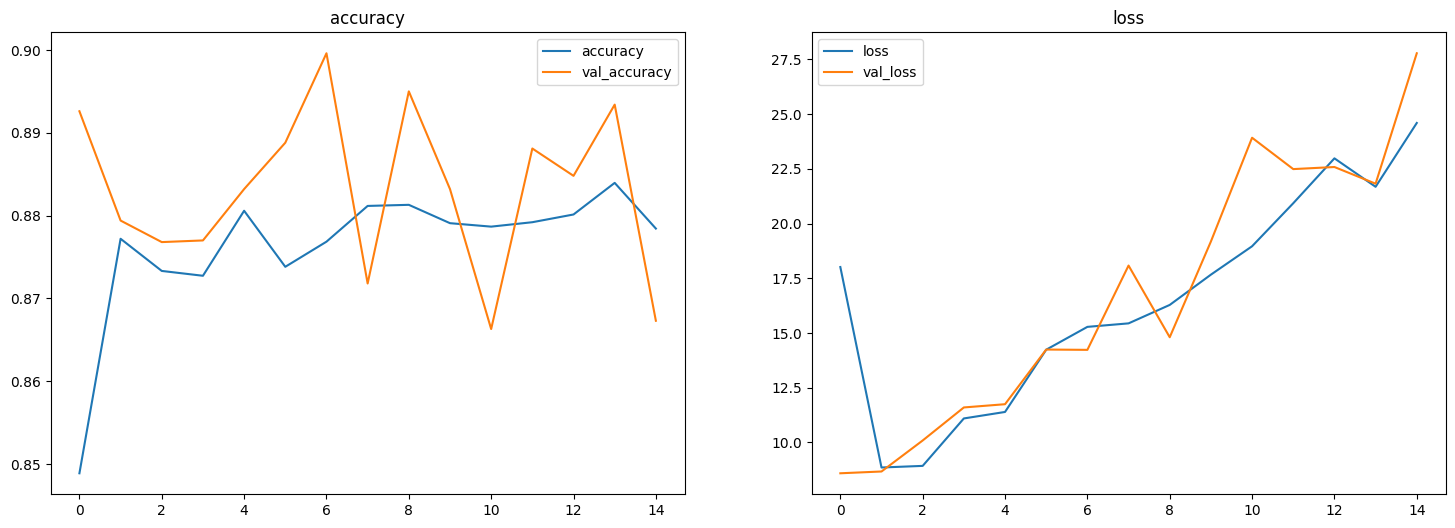

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [13]:
########################################################################

### Earyl Stopping 적용

In [14]:
from keras.callbacks import EarlyStopping

In [15]:
callbacks_early_stopping = EarlyStopping(monitor="loss", patience=2) # 개선이 없어도 2번 더 실행

model_mnist = Sequential()

model_mnist.add(Dense(units=units, input_dim=28*28, activation='relu'))
model_mnist.add(Dense(units=10, activation='sigmoid'))

model_mnist.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [16]:
history = model_mnist.fit(x=X_train2, y=y_train2, epochs=epochs, batch_size=batch_size,
                          validation_data=(X_test2, y_test2), callbacks=[callbacks_early_stopping])

Epoch 1/15
150/150 [==============================] - 2s 10ms/step - loss: 18.5805 - accuracy: 0.8468 - val_loss: 7.0889 - val_accuracy: 0.8935
Epoch 2/15
150/150 [==============================] - 1s 9ms/step - loss: 7.9619 - accuracy: 0.8782 - val_loss: 7.7537 - val_accuracy: 0.8805
Epoch 3/15
150/150 [==============================] - 1s 9ms/step - loss: 9.5384 - accuracy: 0.8718 - val_loss: 9.4771 - val_accuracy: 0.8802
Epoch 4/15
150/150 [==============================] - 1s 9ms/step - loss: 10.7935 - accuracy: 0.8747 - val_loss: 11.8617 - val_accuracy: 0.8825


<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

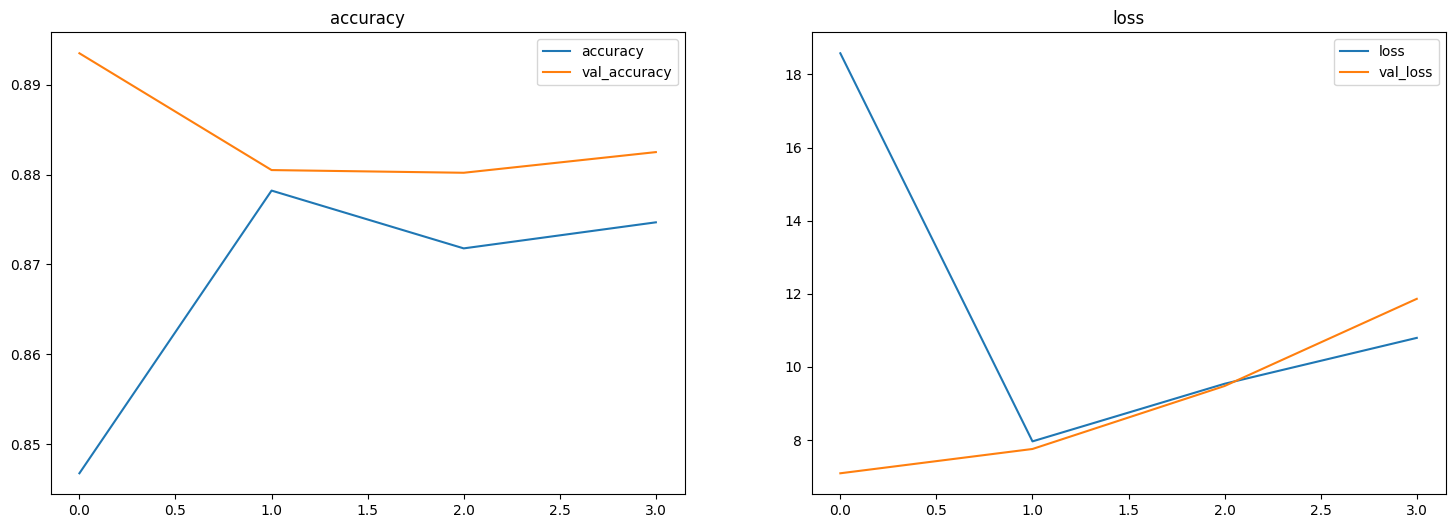

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [18]:
###########################################################################

### Drop Out 적용 

## 드롭아웃

- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 끔(출력을 0으로 만듬)으로써 
- 일반화 시켜 과대적합을 막는 방법
- 샘플들마다 다른(랜덤하게) 뉴런을 끔
- 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있으므로 모든 입력에 주의를 기울이게 됨
- keras.layers.Dropout(뉴런 비율:0-1)
  - 규제를 위한 층 : 파라미터인 뉴런비율은 0.3 기본값
  
- 모델의 훈련이 끝나고 예측 평가를 진행할 때는 drop-out을 적용하지 말아야 함
    - 그래야 훈련된 모든 뉴런을 이용해 예측을 진행 할 수 있음
    - 케라스는 예측 평가시(evaluation)에서 drop-out을 자동으로 적용시키지 않는다
        - evaluation은 predict에 해당됨(test 데이터로 사용) 

### Dropout만 적용한 경우 

In [19]:
from keras.layers import Dropout

In [20]:
model_mnist = Sequential()

model_mnist.add(Dense(units=units, input_dim=28*28, activation='relu'))
model_mnist.add(Dropout((0.4)))
model_mnist.add(Dense(units=10, activation='sigmoid'))

model_mnist.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [21]:
history = model_mnist.fit(x=X_train2, y=y_train2, epochs=epochs, batch_size=batch_size,
                          validation_data=(X_test2, y_test2))

Epoch 1/15
150/150 [==============================] - 2s 10ms/step - loss: 36.7266 - accuracy: 0.8058 - val_loss: 14.8305 - val_accuracy: 0.9140
Epoch 2/15
150/150 [==============================] - 1s 9ms/step - loss: 26.4306 - accuracy: 0.8540 - val_loss: 15.6530 - val_accuracy: 0.9092
Epoch 3/15
150/150 [==============================] - 1s 9ms/step - loss: 24.7224 - accuracy: 0.8573 - val_loss: 14.7009 - val_accuracy: 0.9150
Epoch 4/15
150/150 [==============================] - 1s 10ms/step - loss: 22.8041 - accuracy: 0.8585 - val_loss: 12.1398 - val_accuracy: 0.9108
Epoch 5/15
150/150 [==============================] - 1s 9ms/step - loss: 19.9177 - accuracy: 0.8587 - val_loss: 12.1610 - val_accuracy: 0.9059
Epoch 6/15
150/150 [==============================] - 1s 10ms/step - loss: 18.5481 - accuracy: 0.8539 - val_loss: 9.6686 - val_accuracy: 0.9099
Epoch 7/15
150/150 [==============================] - 1s 10ms/step - loss: 15.4301 - accuracy: 0.8569 - val_loss: 10.4979 - val_accura

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

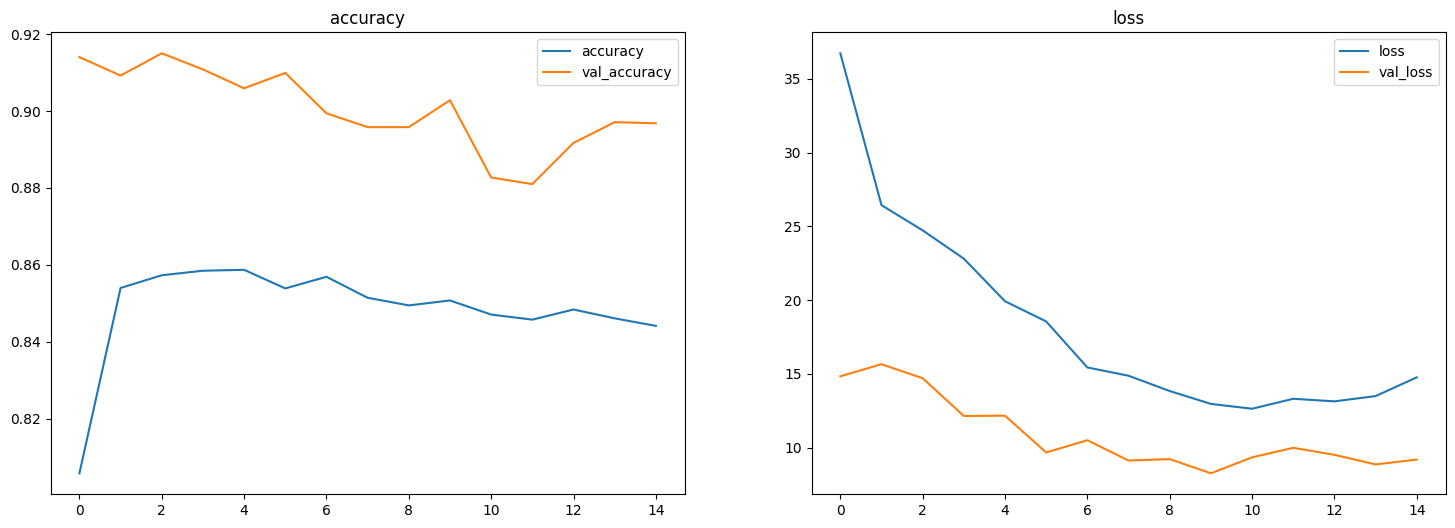

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

### Dropout + Early Stopping 둘 다 적용한 경우

In [23]:
model_mnist = Sequential()

model_mnist.add(Dense(units=units, input_dim=28*28, activation='relu'))
model_mnist.add(Dropout((0.4)))
model_mnist.add(Dense(units=10, activation='sigmoid'))

model_mnist.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [24]:
history = model_mnist.fit(x=X_train2, y=y_train2, epochs=epochs, batch_size=batch_size,
                          validation_data=(X_test2, y_test2), callbacks=[callbacks_early_stopping])

Epoch 1/15
150/150 [==============================] - 2s 10ms/step - loss: 37.4982 - accuracy: 0.8015 - val_loss: 17.5449 - val_accuracy: 0.8940
Epoch 2/15
150/150 [==============================] - 1s 10ms/step - loss: 26.3518 - accuracy: 0.8518 - val_loss: 14.5250 - val_accuracy: 0.9181
Epoch 3/15
150/150 [==============================] - 1s 10ms/step - loss: 24.1742 - accuracy: 0.8579 - val_loss: 12.7035 - val_accuracy: 0.9202
Epoch 4/15
150/150 [==============================] - 1s 10ms/step - loss: 21.6442 - accuracy: 0.8602 - val_loss: 12.1141 - val_accuracy: 0.9179
Epoch 5/15
150/150 [==============================] - 1s 10ms/step - loss: 19.9082 - accuracy: 0.8593 - val_loss: 11.5562 - val_accuracy: 0.9047
Epoch 6/15
150/150 [==============================] - 1s 9ms/step - loss: 17.3622 - accuracy: 0.8576 - val_loss: 11.1841 - val_accuracy: 0.9006
Epoch 7/15
150/150 [==============================] - 1s 10ms/step - loss: 15.3336 - accuracy: 0.8555 - val_loss: 9.4458 - val_accu

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

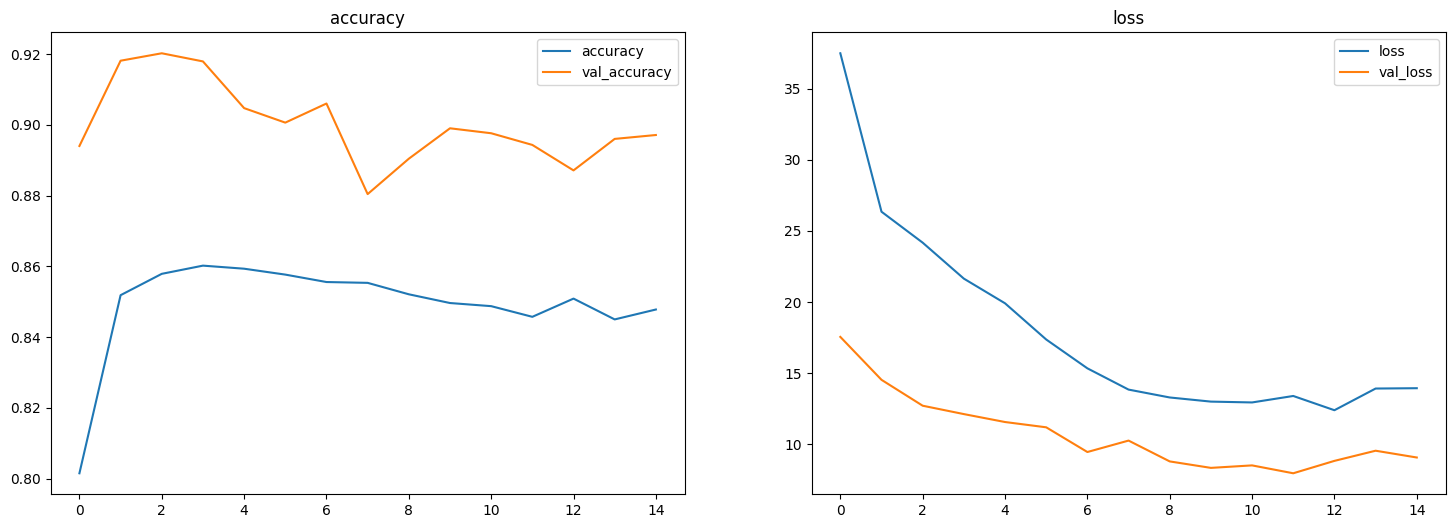

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [26]:
############################################################################

### CheckPoint

CheckPoint (체크포인트)
- 모델 학습 과정 중 특정 시점의 모델의 가중치와 파라미터를 저장한 상태
- 학습 중인 모델의 진행 상황을 특정 지점에서 보존하는 데 사용
- ModelCheckpoint('best-model.keras')
  - 최상의 검증 점수를 낸 모델을 파일로 저장(베스트 파라미터 모델과 같은 개념)
  - model = keras.models.load_model('best-model.keras')
  - 이후 이 model 사용 

In [28]:
from keras.callbacks import ModelCheckpoint